In [1]:
# Import the dependencies.
import random
import numpy as np
import timeit
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
from citipy import citipy
from datetime import datetime
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
from scipy.stats import linregress

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

636

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lagoa
Processing Record 2 of Set 1 | fortuna
Processing Record 3 of Set 1 | makakilo city
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | sikeston
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | linjiang
Processing Record 12 of Set 1 | tornio
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 15 of Set 1 | dawei
Processing Record 16 of Set 1 | rosarito
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | bay roberts
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | ilo
Processi

Processing Record 37 of Set 4 | tabuk
Processing Record 38 of Set 4 | sorland
Processing Record 39 of Set 4 | sinnamary
Processing Record 40 of Set 4 | hasaki
Processing Record 41 of Set 4 | buchanan
Processing Record 42 of Set 4 | beloha
Processing Record 43 of Set 4 | kemin
Processing Record 44 of Set 4 | oswego
Processing Record 45 of Set 4 | nanortalik
Processing Record 46 of Set 4 | hambantota
Processing Record 47 of Set 4 | christchurch
Processing Record 48 of Set 4 | haines junction
Processing Record 49 of Set 4 | flinders
Processing Record 50 of Set 4 | nam tha
City not found. Skipping...
Processing Record 1 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 2 of Set 5 | atasu
Processing Record 3 of Set 5 | nouadhibou
Processing Record 4 of Set 5 | taksimo
Processing Record 5 of Set 5 | maneadero
Processing Record 6 of Set 5 | shasta lake
Processing Record 7 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 8 of Set 5 | lata
Processing Record 9 of

Processing Record 21 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 22 of Set 8 | tarhunah
City not found. Skipping...
Processing Record 23 of Set 8 | kangaatsiaq
Processing Record 24 of Set 8 | tura
Processing Record 25 of Set 8 | hovd
Processing Record 26 of Set 8 | san ramon
Processing Record 27 of Set 8 | aransas pass
Processing Record 28 of Set 8 | waqqas
Processing Record 29 of Set 8 | karasburg
Processing Record 30 of Set 8 | beyneu
Processing Record 31 of Set 8 | burhaniye
Processing Record 32 of Set 8 | edgewater
Processing Record 33 of Set 8 | tocache
Processing Record 34 of Set 8 | fernandina beach
Processing Record 35 of Set 8 | miraflores
Processing Record 36 of Set 8 | labutta
City not found. Skipping...
Processing Record 37 of Set 8 | markala
Processing Record 38 of Set 8 | walvis bay
Processing Record 39 of Set 8 | altus
Processing Record 40 of Set 8 | yarmouth
Processing Record 41 of Set 8 | the valley
Processing Record 42 of Set 8 | witu
Processing 

Processing Record 7 of Set 12 | dongfeng
Processing Record 8 of Set 12 | say
Processing Record 9 of Set 12 | lompoc
Processing Record 10 of Set 12 | birao
Processing Record 11 of Set 12 | yatou
Processing Record 12 of Set 12 | half moon bay
Processing Record 13 of Set 12 | vikesa
Processing Record 14 of Set 12 | chittur
Processing Record 15 of Set 12 | aleksinac
Processing Record 16 of Set 12 | charagua
Processing Record 17 of Set 12 | sisimiut
Processing Record 18 of Set 12 | greymouth
Processing Record 19 of Set 12 | hemnesberget
Processing Record 20 of Set 12 | kollam
Processing Record 21 of Set 12 | ures
Processing Record 22 of Set 12 | nokaneng
Processing Record 23 of Set 12 | zalantun
Processing Record 24 of Set 12 | drumheller
Processing Record 25 of Set 12 | wewak
Processing Record 26 of Set 12 | caceres
Processing Record 27 of Set 12 | sungairaya
Processing Record 28 of Set 12 | aneby
Processing Record 29 of Set 12 | orotukan
Processing Record 30 of Set 12 | mafinga
Processing

In [7]:
len(city_data)

576

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lagoa,39.0500,-27.9833,64.76,84,100,24.79,PT,2021-11-22 21:30:13
1,Fortuna,40.5982,-124.1573,70.93,46,1,3.00,US,2021-11-22 21:26:22
2,Makakilo City,21.3469,-158.0858,80.92,70,90,9.22,US,2021-11-22 21:26:25
3,Arraial Do Cabo,-22.9661,-42.0278,73.26,60,0,13.80,BR,2021-11-22 21:30:13
4,Sikeston,36.8767,-89.5879,48.20,39,1,3.44,US,2021-11-22 21:30:14
5,Port Elizabeth,-33.9180,25.5701,66.49,88,90,5.75,ZA,2021-11-22 21:30:05
6,Busselton,-33.6500,115.3333,54.05,63,99,7.54,AU,2021-11-22 21:30:14
7,Puerto Ayora,-0.7393,-90.3518,78.76,70,10,13.89,EC,2021-11-22 21:30:15
8,Mataura,-46.1927,168.8643,57.65,52,23,3.89,NZ,2021-11-22 21:30:15
9,Rikitea,-23.1203,-134.9692,75.00,68,1,10.87,PF,2021-11-22 21:25:36


In [9]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lagoa,PT,2021-11-22 21:30:13,39.0500,-27.9833,64.76,84,100,24.79
1,Fortuna,US,2021-11-22 21:26:22,40.5982,-124.1573,70.93,46,1,3.00
2,Makakilo City,US,2021-11-22 21:26:25,21.3469,-158.0858,80.92,70,90,9.22
3,Arraial Do Cabo,BR,2021-11-22 21:30:13,-22.9661,-42.0278,73.26,60,0,13.80
4,Sikeston,US,2021-11-22 21:30:14,36.8767,-89.5879,48.20,39,1,3.44


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

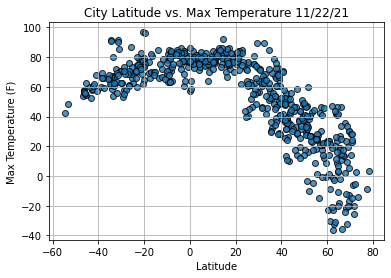

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

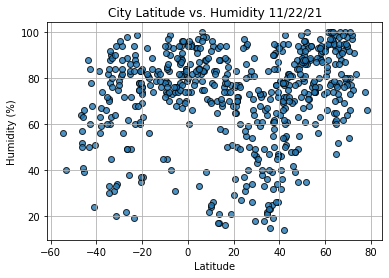

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

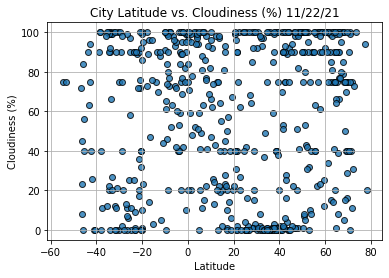

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

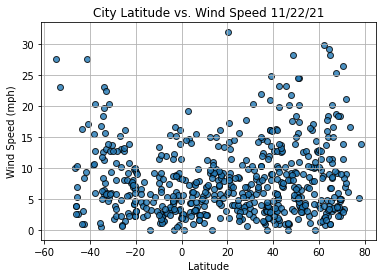

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Create a function to perform linear regression on the weather data and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    print(f"r-value:{r_value}")

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

r-value:-0.8515813567826723


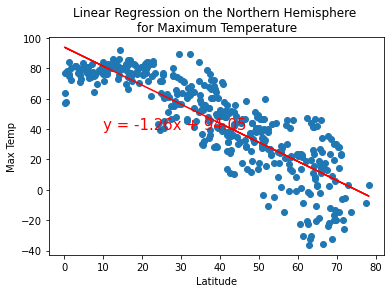

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

r-value:0.6115745363957598


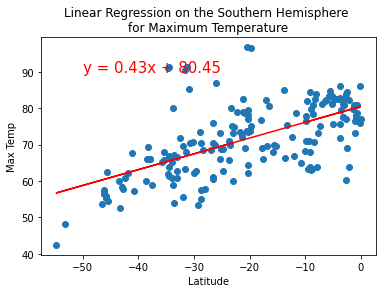

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

r-value:0.20505910196546326


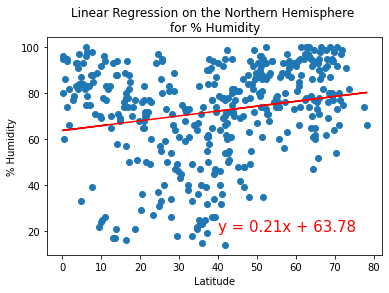

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,20))

r-value:0.38042974576121436


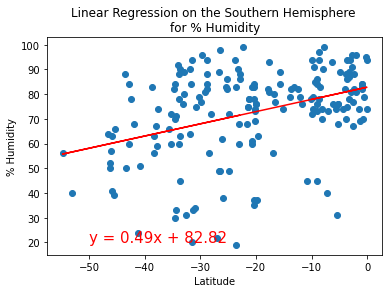

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,20))

r-value:0.14488389204172278


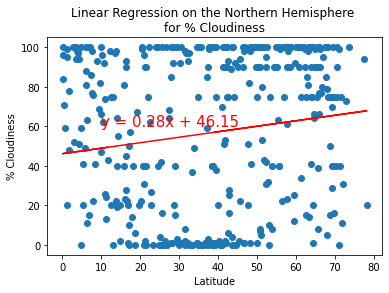

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(10,60))

r-value:0.23130432082122887


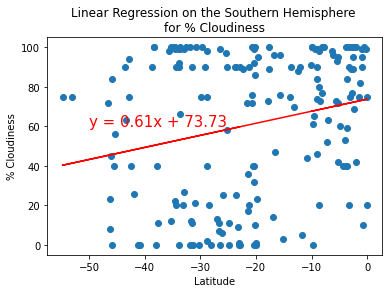

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

r-value:0.16077631460384378


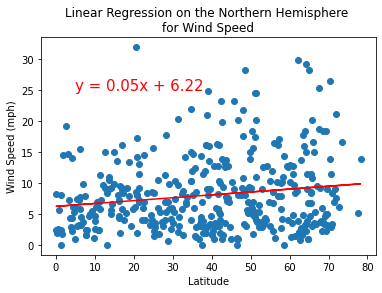

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed (mph)',(5,25))

r-value:-0.31579732604954813


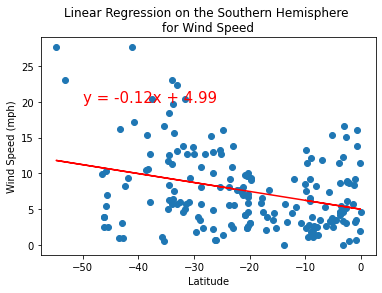

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed (mph)',(-50,20))